[[1 1 0 1 0 1 0 0 0 0]
 [1 0 0 0 1 0 0 0 1 0]
 [1 0 0 0 1 1 0 0 1 0]
 [1 0 0 0 0 0 0 0 1 1]
 [1 1 1 1 1 1 1 0 1 1]
 [1 0 0 0 1 0 0 1 0 0]
 [1 1 0 1 0 0 1 0 1 1]
 [0 0 0 0 0 0 0 0 1 0]]
Best :  0.7101586419527649


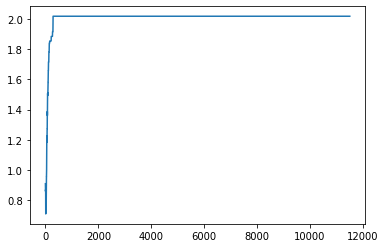

In [129]:
import math
import numpy as np
import random as rand
import matplotlib.pyplot as plt
# Use simulated annealing

# Problem Configuration
n = 10;
k = 8;
x = np.array([rand.random() for i in range(n)]) # point of interest
swapConst = 0.1; # like Boltzmann constant

temp = 1000;
coolRate = 0.01;

# cost function for the problem 
# Cost of state w.r.t x
def energy(state):
    # Euclidean distance
    return np.sqrt(np.sum((x - np.sum(state, axis = 0)/k)**2));

def probability(E1, E2, temp):
    return 1.0 if E2 < E1 else math.exp((E1-E2) / temp)


def annealing():
    temp = 1000;
    coolRate = 0.001;
    swapConst = 0.1;
    
    # for fit analysis
    fit = []
    # Give a first guess
    current = np.array([[rand.randint(0,1) for j in range(n)] for i in range(k)])
    # Best solution so-far 
    best = current;
    while temp > .01:
        neighbor = np.copy(current)
        # this tells us how many strings undergo swaps
#         swapNum = 1 + math.floor(k*math.exp((E1-E2) / (swapConst*temp)));

#         posList = rand.sample(range(k), swapNum)
#         for i in posList:
#             a = rand.randint(0,n-1);
#             neighbor[i][a] = 1 if neighbor[i][a] == 0 else 1;

        a = rand.randint(0, k-1)
        b = rand.randint(0, n-1)
        neighbor[a][b] = 1 if neighbor[a][b] == 0 else 1
            
        curr_energy = energy(current)
        neighbor_energy = energy(neighbor)
        # accept on given probability
        if (probability(curr_energy, neighbor_energy, temp) > rand.random()):
            current = neighbor
        
        # Check if this solution is the best so-far
        if (neighbor_energy < energy(best)):
            best = current;
            
        fit.append(energy(current))
        temp *= 1 - coolRate
    
    return best, fit
        
    
best, fit = annealing()
print(best)
print("Best : ", energy(best))
# plot the figure
plt.figure()
plt.plot(fit)
plt.show()

In [86]:
E1 = 0.1
E2 = 1
temp = 90
swapNum = 1 + math.floor(n*math.exp((E1-E2) / (0.1*temp)))                        
print(swapNum);


10
